BloomTech Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

**We recommend that you use your portfolio project dataset for all assignments this sprint.**

**But if you aren't ready yet, or you want more practice, then use the New York City property sales dataset for today's assignment.** Follow the instructions below, to just keep a subset for the Tribeca neighborhood, and remove outliers or dirty data. [Here's a video walkthrough](https://youtu.be/pPWFw8UtBVg?t=584) you can refer to if you get stuck or want hints!

- Data Source: [NYC OpenData: NYC Citywide Rolling Calendar Sales](https://data.cityofnewyork.us/dataset/NYC-Citywide-Rolling-Calendar-Sales/usep-8jbt)
- Glossary: [NYC Department of Finance: Rolling Sales Data](https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page)

## Assignment

Complete these tasks for your assignment/project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. Review requirements for your portfolio project on Canvas, and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

Target  = SALE PRICE


My problem is regression


In [1]:
data = "C:/Users/ISHMO_CT/Downloads/Bloomtech/NW_C_price/dataset/NYC_Citywide_Rolling_Calendar_Sales_20240306.csv"

In [2]:
import pandas as pd
import numpy as np

In [3]:
# from ydata_profiling import ProfileReport
# report = ProfileReport(df)
# report.to_notebook_iframe()


In [4]:
# # Finding out if there are outliers
# import matplotlib.pyplot as plt
# plt.scatter(df['GROSS SQUARE FEET'], df['SALE PRICE'])
# plt.xlabel('GSF')
# plt.ylabel('Price')
# plt.show()

### Wrangle and analyse data

In [5]:
def wrangle(filepath):
    # Reading the file
    df = pd.read_csv(filepath)

    # Setting the date to the date time object
    df["SALE DATE"] = pd.to_datetime(df["SALE DATE"])

    # refining the Sale date to an index column
    df.set_index('SALE DATE', inplace=True)

    #dropping with Null values that have NaN as their only unique value
    df.dropna(axis=1, inplace=True)

    return df

In [6]:
df = wrangle(data)
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BLOCK,LOT,ADDRESS,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
SALE DATE,,,,,,,,,
2023-04-18,2,BATHGATE,01 ONE FAMILY DWELLINGS,3030,66,4453 PARK AVENUE,1,A1,215000
2023-08-23,2,BATHGATE,01 ONE FAMILY DWELLINGS,3030,66,4453 PARK AVENUE,1,A1,570000
2023-04-14,2,BATHGATE,01 ONE FAMILY DWELLINGS,3035,52,461 EAST 178 STREET,1,A1,0
2023-10-24,2,BATHGATE,01 ONE FAMILY DWELLINGS,3053,86,2364 WASHINGTON AVENUE,1,S0,0
2023-06-26,2,BATHGATE,02 TWO FAMILY DWELLINGS,2904,22,454 EAST 172 STREET,1,B9,350000


In [7]:
# print(df.isnull().sum())
# print(df['COMMERCIAL UNITS'].unique())
df.shape

(71833, 9)

### SPLIT DATA

In [8]:
## Wrangle and analyse data
target  = 'SALE PRICE'
y = df[target]
X = df.drop(columns=target)


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42) 

### Baseline 

We are using mean absolute error

In [10]:
from sklearn.metrics import mean_absolute_error

y_train_pred = [y_train.mean()] * len(y_train)
Baseline = mean_absolute_error(y_train, y_train_pred)
print("Baseline using mean absolute error is", Baseline)

Baseline using mean absolute error is 1395805.3498567955


### Create a model using linear regression

In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from category_encoders import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

model_lr = make_pipeline(
    OrdinalEncoder(),
    StandardScaler(),
    SimpleImputer(),
    LinearRegression()
)

model_lr.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
                                      'ADDRESS',
                                      'BUILDING CLASS AT TIME OF SALE'],
                                mapping=[{'col': 'NEIGHBORHOOD',
                                          'data_type': dtype('O'),
                                          'mapping': MORRISANIA/LONGWOOD        1
NEW SPRINGVILLE            2
BOROUGH PARK               3
MURRAY HILL                4
FINANCIAL                  5
                        ... 
BRONX PARK               250
DONGAN HILLS-OLD TOWN    251
CO-OP CITY               252
FRESH KILLS              253
NaN                       -2
Length: 254, dtype: i...
215-44 47TH AVENUE, 1A        56215
33 24 91ST STREET, 4R         56216
577 EAST 28TH STREET          56217
NaN                              -2
Length: 56218, dtype: int64},
                                         {'col': 'BUILDING CLASS AT TIME OF '
                                                 'SALE',
                                          'data_type': dtype('O'),
                                          'mapping': R3       1
B2       2
R4       3
D4       4
A2       5
      ... 
W4     156
H9     157
V9     158
W1     159
NaN     -2
Length: 160, dtype: int64}])),
                ('standardscaler', StandardScaler()),
                ('simpleimputer', SimpleImputer()),
                ('linearregression', LinearRegression())])

#### Check the baseline

In [12]:
y_val_pred = model_lr.predict(X_val)
model_lr_val_mae = mean_absolute_error(y_val, y_val_pred)
print("Baseline:", model_lr_val_mae)

Baseline: 1434358.7517463588


## Baseline explanation

After fiiting our model with liener regression, the baseline increased i.e the mean absolute error decressed thus shwing an improvement in the prediction

#### Lets try XGB and Gradient Boost

In [13]:
# from xgboost import XGBRegressor
# from category_encoders import OrdinalEncoder
# model_xgb = make_pipeline(
#     OrdinalEncoder(),
#     SimpleImputer(),
#     StandardScaler(),
#     XGBRegressor(random_state = 42, n_jobs=-1, n_enstimator = 75)
# )

# model_xgb.fit(X_train, y_train)

from xgboost import XGBRegressor
from category_encoders import OrdinalEncoder

model_xg = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    XGBRegressor(random_state=42, n_jobs=-1)
)

model_xg.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
                                      'ADDRESS',
                                      'BUILDING CLASS AT TIME OF SALE'],
                                mapping=[{'col': 'NEIGHBORHOOD',
                                          'data_type': dtype('O'),
                                          'mapping': MORRISANIA/LONGWOOD        1
NEW SPRINGVILLE            2
BOROUGH PARK               3
MURRAY HILL                4
FINANCIAL                  5
                        ... 
BRONX PARK               250
DONGAN HILLS-OLD TOWN    251
CO-OP CITY               252
FRESH KILLS              253
NaN                       -2
Length: 254, dtype: i...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=-1,
                              num_parallel_tree=None, random_state=42, ...))])

### Calculate the baseline of the xgb model

In [14]:
y_val_pred_xg = model_xg.predict(X_val)
baseline = mean_absolute_error(y_val, y_val_pred_xg)
print("Baseline:", baseline)

Baseline: 1725194.0284488916


#### Try out Decision Tree because XGBOOST is creating a new columns thus cannot align columns with the importances 

In [15]:
from sklearn.tree import DecisionTreeRegressor

model_dt = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    DecisionTreeRegressor(random_state=42)
)

model_dt.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
                                      'ADDRESS',
                                      'BUILDING CLASS AT TIME OF SALE'],
                                mapping=[{'col': 'NEIGHBORHOOD',
                                          'data_type': dtype('O'),
                                          'mapping': MORRISANIA/LONGWOOD        1
NEW SPRINGVILLE            2
BOROUGH PARK               3
MURRAY HILL                4
FINANCIAL                  5
                        ... 
BRONX PARK               250
DONGAN HILLS-OLD TOWN    251
CO-OP CITY               252
FRESH KILLS              253
NaN                       -2
Length: 254, dtype: i...
86-04 117TH STREET            56214
215-44 47TH AVENUE, 1A        56215
33 24 91ST STREET, 4R         56216
577 EAST 28TH STREET          56217
NaN                              -2
Length: 56218, dtype: int64},
                                         {'col': 'BUILDING CLASS AT TIME OF '
                                                 'SALE',
                                          'data_type': dtype('O'),
                                          'mapping': R3       1
B2       2
R4       3
D4       4
A2       5
      ... 
W4     156
H9     157
V9     158
W1     159
NaN     -2
Length: 160, dtype: int64}])),
                ('simpleimputer', SimpleImputer()),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

### Lets calculate the baseline of the  Decision tree regressor

In [16]:
y_val_pred_rf = model_dt.predict(X_val)
baseline = mean_absolute_error(y_val, y_val_pred_rf)
print("Baseline for random forest model:", baseline)

Baseline for random forest model: 2542250.8598774886


### RandomForestclassifier

In [17]:
# from sklearn.ensemble import RandomForestClassifier

# model_rfc = make_pipeline(
#     OrdinalEncoder(),
#     SimpleImputer(),
#     RandomForestClassifier(random_state=42)   
# )

In [18]:
# model_rfc.fit(X_train, y_train)

### Let's find out the model permutation importances

Text(0, 0.5, 'features')

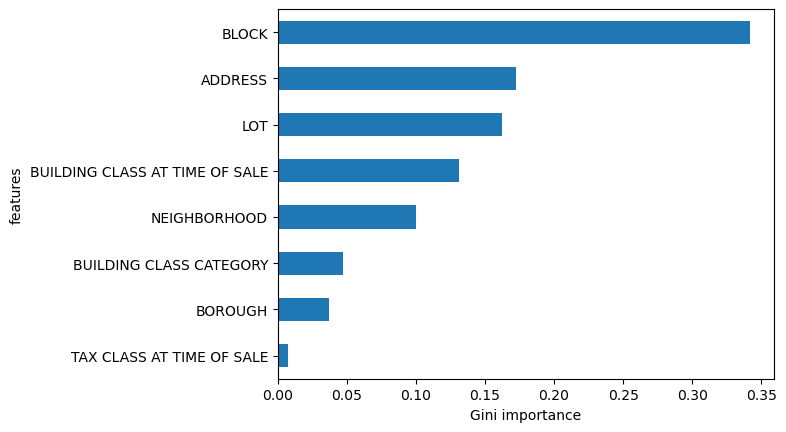

In [19]:
import matplotlib.pyplot as plt
importances = model_dt.named_steps['decisiontreeregressor'].feature_importances_ 
feature_names = X_train.columns


feat_imp = pd.Series(data = importances, index=feature_names).sort_values()
feat_imp.plot(kind='barh')
plt.xlabel('Gini importance')
plt.ylabel('features')

### Lets create a partial dependent plot

In [20]:
# Select the feature
from pdpbox import pdp
sample_feature = 'BLOCK'


pdp_list = pdp.pdp_isolate(
    model = model_dt, 
    dataset=X_val,
    model_features = X_val.columns,
    feature = sample_feature
)

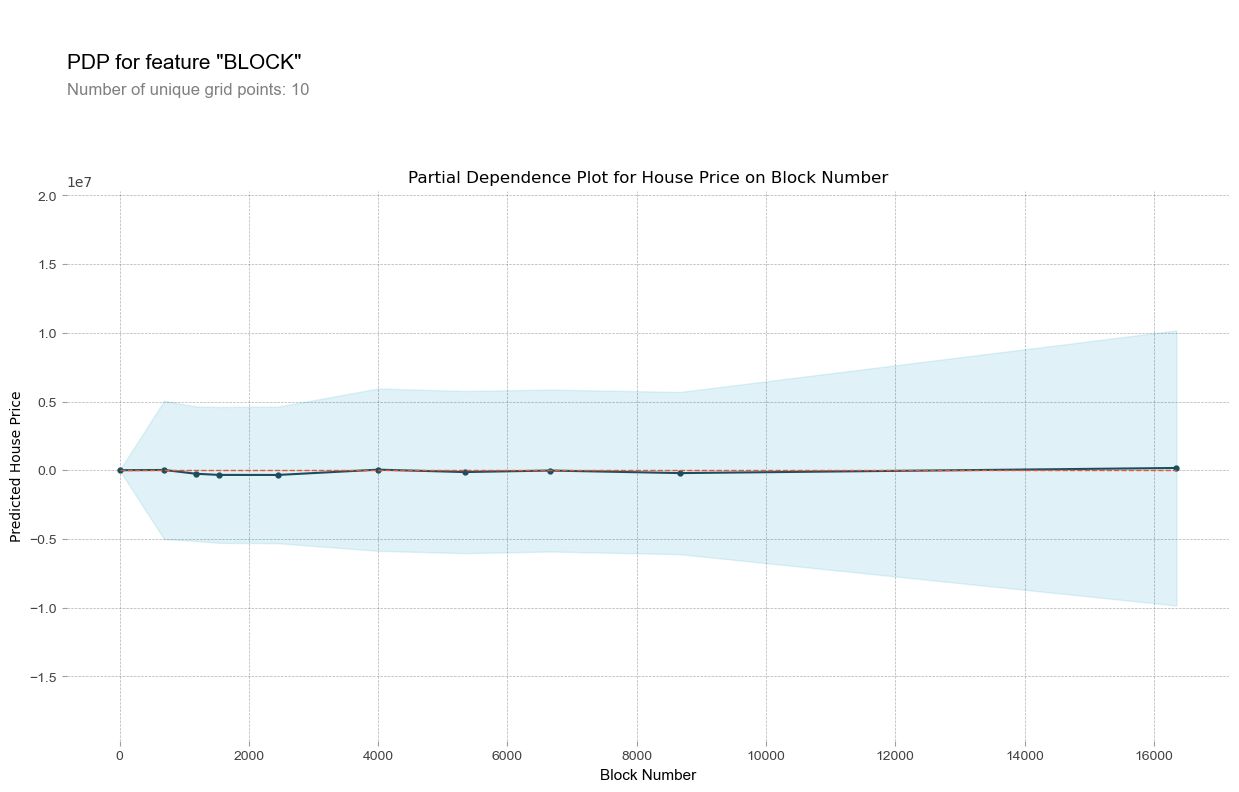

In [23]:
pdp.pdp_plot(pdp_list, feature_name = sample_feature)
plt.xlabel('Block Number')
plt.ylabel('Predicted House Price')
plt.title('Partial Dependence Plot for House Price on Block Number')
plt.show()